In [210]:
include("drive-TaylorGreen.jl")
theme(:dracula)


Starting braid_TestInitAccess

   braid_TestInitAccess:   Starting Test 1
   braid_TestInitAccess:   u = init(t=0.00e+00)
   braid_TestInitAccess:   access(u) 
   braid_TestInitAccess:   check output: wrote u for initial condition at t=0.00e+00. 

   braid_TestInitAccess:   free(u) 
Finished braid_TestInitAccess
Serialized size of user vector: 6291504
Check output for objects not properly freed:
IdDict{Any, Any}()



Starting braid_TestClone

   braid_TestClone:   Starting Test 1
   braid_TestClone:   u = init(t=0.00e+00)
   braid_TestClone:   v = clone(u)
   braid_TestClone:   access(u)
   braid_TestClone:   access(v)
   braid_TestClone:   check output:  wrote u and v for initial condition at t=0.00e+00.

   braid_TestClone:   free(u)
   braid_TestClone:   free(v)
Finished braid_TestClone

Starting braid_TestSpatialNorm

   braid_TestSpatialNorm:   Starting Test 1
   braid_TestSpatialNorm:   u = init(t=0.00e+00)
   braid_TestSpatialNorm:   spatialnorm(u) 
   braid_TestSpatialNorm:   v = clone(u)
   braid_TestSpatialNorm:   v = u - v 
   braid_TestSpatialNorm:   spatialnorm(v) 
   braid_TestSpatialNorm:   Test 1 Passed
   braid_TestSpatialNorm:   actual output:    spatialnorm(v) = 0.00e+00  
   braid_TestSpatialNorm:   expected output:  spatialnorm(v) = 0.0 

   braid_TestSpatialNorm:   Starting Test 2
   braid_TestSpatialNorm:   w = clone(u)
   braid_TestSpatialNorm:   w = u + w 
   braid_TestSpa

Check output for objects not freed:
IdDict{Any, Any}()
  7.737926 seconds (12.67 M allocations: 1.166 GiB, 2.32% gc time, 60.49% compilation time)


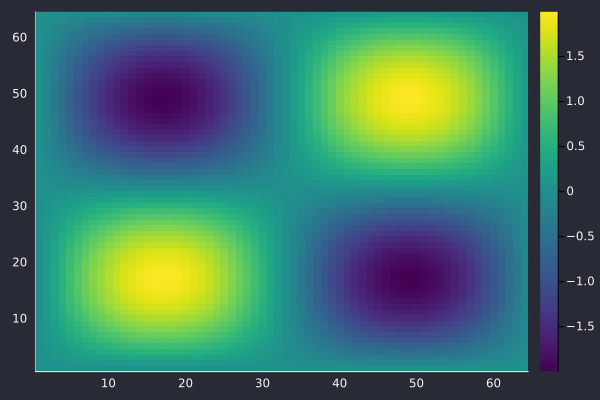

In [200]:
test()

In [211]:
tf = 32.
app = main(ml=1, tstop=tf, ntime=256, delta_rank=1)

In [ ]:
p = sortperm(app.times);

In [208]:
exps = reduce(hcat, app.lyapunov_exps)'
plot(exps)

MethodError: MethodError: reducing over an empty collection is not allowed; consider supplying `init` to the reducer

┌ Info: Saved animation to /tmp/jl_2lwpSzSDYn.gif
└ @ Plots /home/cadaverous/.julia/packages/Plots/9Q9pN/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_2lwpSzSDYn.gif")
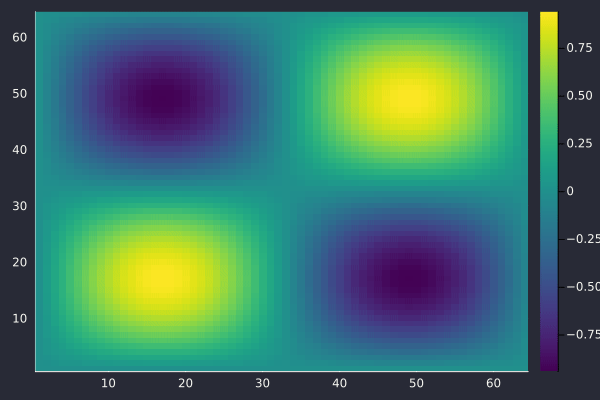

In [209]:
function animate_curl_slice(traj)
    anim = @animate for i in eachindex(traj)
        u = get_views(traj[i])
        curlz = ∇X(u)[3]
        heatmap(curlz[:,:,trunc(Int64, 32/4+4)])
    end
    gif(anim, fps=20)
end
animate_curl_slice(app.solution[p])

┌ Info: Saved animation to /tmp/jl_cbelepcfAL.gif
└ @ Plots /home/cadaverous/.julia/packages/Plots/9Q9pN/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_cbelepcfAL.gif")
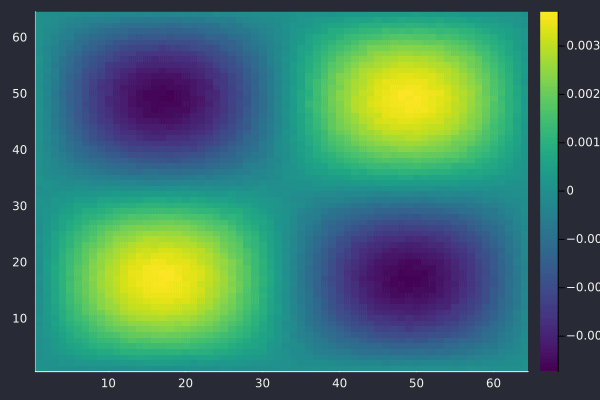

In [205]:
# animate_curl_slice([app.lyapunov_vecs[i][:, 1] for i in p])
animate_curl_slice([app.lyapunov_vecs[i] for i in p])

┌ Info: Saved animation to /tmp/jl_252vYFQbAx.gif
└ @ Plots /home/cadaverous/.julia/packages/Plots/9Q9pN/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_252vYFQbAx.gif")
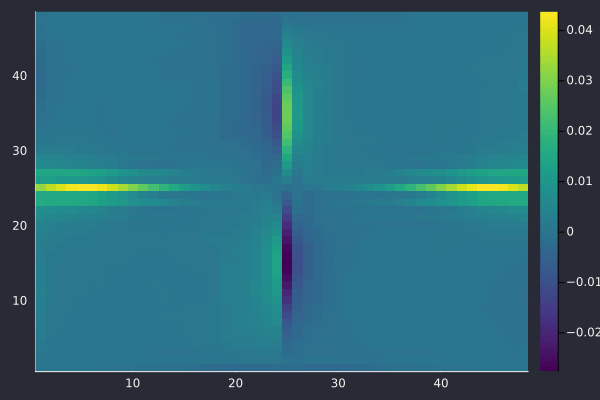

In [196]:
# u = get_views(app.solution[p[end]])
u = get_views(app.lyapunov_vecs[p[end]])
curlz = ∇X(u)[3]
@gif for i in 1:size(curlz)[1]
    # heatmap(curlz[:,:,i])
    heatmap(u[1][:,:,i])
end

In [198]:
app.lyapunov_vecs

257-element Vector{Any}:
 [6.30748128478591e-5, 0.00032782429048766593, 0.0007394534684562023, 0.001158279847391108, 0.0015889025005504768, 0.001992189370732199, 0.0023489581937850366, 0.002647241819519031, 0.002876199026238041, 0.0030230827863013516  …  0.0010588737532421942, 0.0011106657593730341, 0.0011490165700393466, 0.0011676642539384836, 0.0011639513959212147, 0.0011454272106295948, 0.0011021387011108338, 0.0010243391794526719, 0.0009074257841226288, 0.0007511827078853241]
 [6.30748128478591e-5, 0.00032782429048766593, 0.0007394534684562023, 0.001158279847391108, 0.0015889025005504768, 0.001992189370732199, 0.0023489581937850366, 0.002647241819519031, 0.002876199026238041, 0.0030230827863013516  …  0.0010588737532421942, 0.0011106657593730341, 0.0011490165700393466, 0.0011676642539384836, 0.0011639513959212147, 0.0011454272106295948, 0.0011021387011108338, 0.0010243391794526719, 0.0009074257841226288, 0.0007511827078853241]
 [6.30748128478591e-5, 0.00032782429048766593, 0.000739